# Лабораторна робота 4
### Студента групи МІТ-31 (підгрупа 2)
### Хоміка Богдана Сергійовича

## Завдання
1. Здійснити загальні операції з використанням TensorFlow (створити набір даних (розмір за власним рішенням) у вигляді тензорів, провести CRUD операції над даними (скаляр, вектор, матриця)).
2. Згенерувати набір даних для регресії та класифікації з використанням TensorFlow
3. Здійснити графічний аналіз наборів даних за допомогою Matplotlib
4. Відповіді оформити .ipynb документом
5. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab4 де має бути .ipynb файл та необхідні файли з даними

### Пункт 4 я виконував в усіх пунктах почергово, його не відзначав

In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow

  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30702 sha256=8eee75f0f233e65fdcf593ba143d30c2351d95f6a16c806a9056a31040bec5bd
  Stored in directory: c:\users\пк\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=f8a05cb400bfcb0c43f533a755431e6fd4551649ddeb54b07d32012d1d808fd3
  Stored in directory: c:\users\пк\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import tensorflow as tf

### Пункт 1

In [50]:
tf1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(tf1)
print(np.square(tf1))
# перетворюєм в Numpy об'єкт
tf1 = tf1 + 100
print(tf1)
# оновлюєм
tf1_new = tf.gather(tf1, [1])#лише другий рядочок
print(tf1_new)

tf.Tensor(
[[1 3]
 [4 6]
 [7 9]], shape=(3, 2), dtype=int32)
[[ 1  9]
 [16 36]
 [49 81]]
tf.Tensor(
[[101 103]
 [104 106]
 [107 109]], shape=(3, 2), dtype=int32)
tf.Tensor([[104 106]], shape=(1, 2), dtype=int32)


In [51]:
scalar = tf.constant(9)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [52]:
scalar.ndim

0

In [57]:
vector = tf.constant([18, 12, 15])
vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([18, 12, 15])>

In [54]:
vector.ndim

1

In [59]:
mat1 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
mat1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

In [60]:
mat1.ndim

2

In [62]:
mat2 = tf.constant([[1., 2., 3.],
                    [4., 5., 6.],
                    [7., 8., 9.]], dtype=tf.float16)

mat2

<tf.Tensor: shape=(3, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]], dtype=float16)>

In [63]:
mat2.ndim

2

In [64]:
tensor = tf.constant([[[1, 2, 3,],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [65]:
tensor.ndim

3

In [70]:
rnd1 = tf.random.Generator.from_seed(70)
rnd1 = rnd1.normal(shape=(40, 20))
rnd2 = tf.random.Generator.from_seed(10)
rnd2 = rnd2.normal(shape=(50, 30))

In [73]:
df2 = pd.DataFrame(np.random.randint(0, 10, (8, 8)), columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8"])
print(df2)
print(df2.describe(include='all'))

   x1  x2  x3  x4  x5  x6  x7  x8
0   1   7   8   2   6   5   0   7
1   2   4   1   7   4   4   7   9
2   2   9   9   5   7   1   0   6
3   3   7   6   6   8   7   1   5
4   1   8   4   6   9   1   8   1
5   9   7   6   3   1   5   3   0
6   2   9   8   0   1   0   5   7
7   8   3   5   1   9   0   1   2
             x1        x2        x3       x4        x5        x6        x7  \
count  8.000000  8.000000  8.000000  8.00000  8.000000  8.000000  8.000000   
mean   3.500000  6.750000  5.875000  3.75000  5.625000  2.875000  3.125000   
std    3.162278  2.187628  2.587746  2.60494  3.292307  2.695896  3.181981   
min    1.000000  3.000000  1.000000  0.00000  1.000000  0.000000  0.000000   
25%    1.750000  6.250000  4.750000  1.75000  3.250000  0.750000  0.750000   
50%    2.000000  7.000000  6.000000  4.00000  6.500000  2.500000  2.000000   
75%    4.250000  8.250000  8.000000  6.00000  8.250000  5.000000  5.500000   
max    9.000000  9.000000  9.000000  7.00000  9.000000  7.000000  8.00

In [75]:
training_df: pd.DataFrame = pd.DataFrame(
    data={
        'feature1': np.random.rand(10),
        'feature2': np.random.rand(10),
        'feature3': np.random.rand(10),
        'target': np.random.randint(0, 5, 10)
    }
)
features = ['feature1', 'feature2', 'feature3']
print(training_df)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(training_df[features].values, tf.float32),
            tf.cast(training_df['target'].values, tf.int32)
        )
    )
)

for features_tensor, target_tensor in training_dataset:
    print(f'features:{features_tensor} target:{target_tensor}')

   feature1  feature2  feature3  target
0  0.497053  0.523468  0.900945       2
1  0.645815  0.694817  0.847246       2
2  0.818841  0.191740  0.254741       4
3  0.217914  0.272170  0.190255       4
4  0.944384  0.265315  0.292975       3
5  0.178797  0.864631  0.413703       0
6  0.057196  0.480955  0.138031       2
7  0.607045  0.176919  0.251468       4
8  0.227207  0.559204  0.655962       2
9  0.414441  0.170676  0.201314       3
features:[0.49705273 0.5234676  0.9009447 ] target:2
features:[0.6458147  0.6948172  0.84724563] target:2
features:[0.8188407  0.19174017 0.25474122] target:4
features:[0.2179144  0.2721704  0.19025491] target:4
features:[0.9443842  0.26531515 0.2929747 ] target:3
features:[0.17879732 0.86463064 0.4137029 ] target:0
features:[0.0571957  0.4809547  0.13803127] target:2
features:[0.60704535 0.1769186  0.25146812] target:4
features:[0.22720736 0.5592038  0.65596217] target:2
features:[0.41444087 0.17067616 0.20131443] target:3


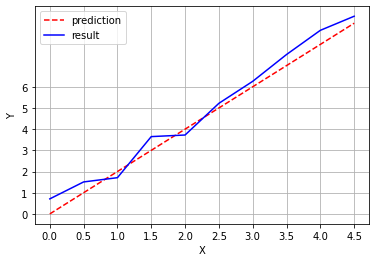

In [81]:
x = np.arange(0, 5, 0.5)
y1 = x * 2

adder = np.random.random(len(x)) * 1.5 - 0.7
y2 = y1 + adder

plt.figure()
plt.grid()
plt.xticks(x)
plt.yticks(range(int(x[-1] * 1.5 + 1)))
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(x, y1, "r--", label="prediction")
plt.plot(x, y2, "b", label="result")

plt.legend()
plt.show()

In [82]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y2, y1)
mse = metrics.mean_squared_error(y2, y1)
print(mae)
print(mse)

0.442905641774443
0.22834840840677498


In [107]:
df = pd.DataFrame(np.array([x, y2, y1]).swapaxes(0,1), columns=['X', 'Y', 'Y_hat'])
print(df)
with open('data.csv', 'w') as f:
    f.write(df.to_csv(index=False))

     X         Y  Y_hat
0  0.0  0.709890    0.0
1  0.5  1.509643    1.0
2  1.0  1.709824    2.0
3  1.5  3.648924    3.0
4  2.0  3.724042    4.0
5  2.5  5.220017    5.0
6  3.0  6.257508    6.0
7  3.5  7.522690    7.0
8  4.0  8.664692    8.0
9  4.5  9.329557    9.0


In [108]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 1s 1s/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 16ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 8ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 8ms/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 8ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 8ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 8ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 8ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 8ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 16ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 8ms/step - loss: 2.6463 - mae: 2.6

In [109]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

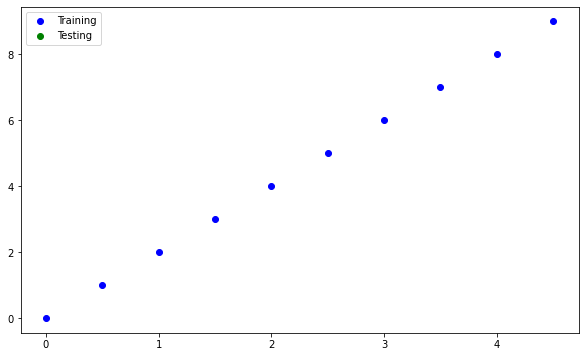

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [111]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [129]:
model.predict([20.0])

array([[39.942238]], dtype=float32)

In [114]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), 
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

model_1.fit(x, y1, epochs=20, verbose=0)

In [115]:
def plot_decision_boundary(model, X, y):
    
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
 
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [116]:
tf.random.set_seed(42)

X_regression = np.arange(0, 100, 5)
y_regression = np.arange(100, 110, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [117]:
model_1.evaluate(x, y1)

1/1 [==============================] - 0s 464ms/step - loss: -53.5553 - accuracy: 0.2000


[-53.5552864074707, 0.20000000298023224]

In [118]:
len(x)

10

In [119]:
X_train, y_train = x[:800], y1[:800]
X_test, y_test = x[800:], y1[800:]

X_train.shape, X_test.shape

((10,), (0,))

In [120]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01), 
                metrics=['accuracy'])

history = model_2.fit(X_train, y_train, epochs=25)

D:\anaconda\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/25
1/1 [==============================] - 1s 1s/step - loss: 3.6568 - accuracy: 0.1000
Epoch 2/25
1/1 [==============================] - 0s 8ms/step - loss: 3.3166 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 0s 8ms/step - loss: 2.9870 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 0s 8ms/step - loss: 2.6683 - accuracy: 0.1000
Epoch 5/25
1/1 [==============================] - 0s 8ms/step - loss: 2.3606 - accuracy: 0.1000
Epoch 6/25
1/1 [==============================] - 0s 0s/step - loss: 2.0638 - accuracy: 0.1000
Epoch 7/25
1/1 [==============================] - 0s 8ms/step - loss: 1.7780 - accuracy: 0.1000
Epoch 8/25
1/1 [==============================] - 0s 8ms/step - loss: 1.5038 - accuracy: 0.1000
Epoch 9/25
1/1 [==============================] - 0s 8ms/step - loss: 1.2406 - accuracy: 0.1000
Epoch 10/25
1/1 [==============================] - 0s 8ms/step - loss: 0.9881 - accuracy: 0.1000
Epoch 11/25
1/1 [================

In [121]:
pd.DataFrame(history.history)

,loss,accuracy
0,3.656841,0.1
1,3.316552,0.0
2,2.987022,0.0
3,2.668347,0.1
4,2.360600,0.1
5,2.063806,0.1
6,1.777956,0.1
7,1.503834,0.1
8,1.240631,0.1
9,0.988077,0.1


Text(0.5, 1.0, 'training_2 ')

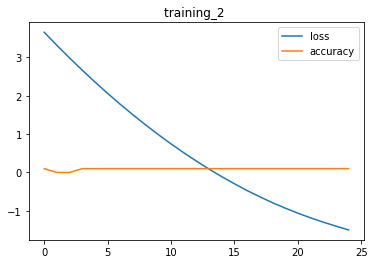

In [122]:
pd.DataFrame(history.history).plot()
plt.title("training_2 ")

In [123]:
input_shape = x[0].shape 
output_shape = y1[0].shape
input_shape, output_shape 

tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(x, y1, epochs=80)

Epoch 1/80
1/1 [==============================] - 1s 800ms/step - loss: 3.2174 - mae: 3.2174
Epoch 2/80
1/1 [==============================] - 0s 8ms/step - loss: 3.1595 - mae: 3.1595
Epoch 3/80
1/1 [==============================] - 0s 8ms/step - loss: 3.1025 - mae: 3.1025
Epoch 4/80
1/1 [==============================] - 0s 0s/step - loss: 3.0455 - mae: 3.0455
Epoch 5/80
1/1 [==============================] - 0s 8ms/step - loss: 2.9885 - mae: 2.9885
Epoch 6/80
1/1 [==============================] - 0s 8ms/step - loss: 2.9314 - mae: 2.9314
Epoch 7/80
1/1 [==============================] - 0s 8ms/step - loss: 2.8744 - mae: 2.8744
Epoch 8/80
1/1 [==============================] - 0s 8ms/step - loss: 2.8174 - mae: 2.8174
Epoch 9/80
1/1 [==============================] - 0s 8ms/step - loss: 2.7604 - mae: 2.7604
Epoch 10/80
1/1 [==============================] - 0s 8ms/step - loss: 2.7033 - mae: 2.7033
Epoch 11/80
1/1 [==============================] - 0s 8ms/step - loss: 2.6463 - mae: 2.6

In [124]:
X_train = x[:80]
y_train = y1[:80]

X_test = x[80:] 
y_test = y1[80:]

len(X_train), len(X_test)

(10, 0)

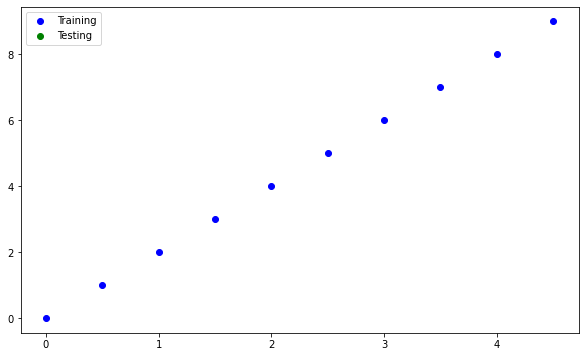

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c='b', label='Training')
plt.scatter(X_test, y_test, c='g', label='Testing')
plt.legend()

In [126]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.fit(X_train, y_train, epochs=80, verbose=0)

In [128]:
model.predict([20.0])

array([[39.942238]], dtype=float32)